In [53]:
import pandas as pd 
from pycaret import classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import numpy as np 

In [54]:
dir_base = "BASES/"
filename = "_BASE_FIOCRUZ_COVID_OBITOS_18032023.xlsx"
filename_full = dir_base + filename
df = pd.read_excel(filename_full)

In [55]:
df.head() 

,ID,PRI_ATEND,DIAS_INTER,FAT_IMP_SIN,SEXO,FX_ETAR,CD_COR,CD_ECIV,ID_ESC,USOU_UTI,DESFECHO
0,1,1,3,1,1,3,2,1,1,0,0
1,2,1,2,1,2,3,2,1,1,0,0
2,3,1,2,2,2,3,2,1,1,0,0
3,4,2,1,1,2,4,2,1,1,1,1
4,4,2,1,1,2,4,2,1,1,0,1


In [56]:
df.shape 

(913, 11)

In [57]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           913 non-null    int64
 1   PRI_ATEND    913 non-null    int64
 2   DIAS_INTER   913 non-null    int64
 3   FAT_IMP_SIN  913 non-null    int64
 4   SEXO         913 non-null    int64
 5   FX_ETAR      913 non-null    int64
 6   CD_COR       913 non-null    int64
 7   CD_ECIV      913 non-null    int64
 8   ID_ESC       913 non-null    int64
 9   USOU_UTI     913 non-null    int64
 10  DESFECHO     913 non-null    int64
dtypes: int64(11)
memory usage: 78.6 KB


In [58]:
df.isnull().sum ()

ID             0
PRI_ATEND      0
DIAS_INTER     0
FAT_IMP_SIN    0
SEXO           0
FX_ETAR        0
CD_COR         0
CD_ECIV        0
ID_ESC         0
USOU_UTI       0
DESFECHO       0
dtype: int64

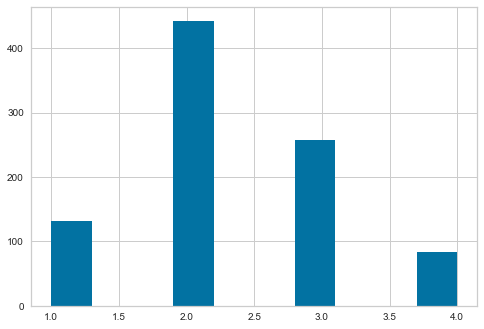

In [59]:
df.DIAS_INTER.hist();

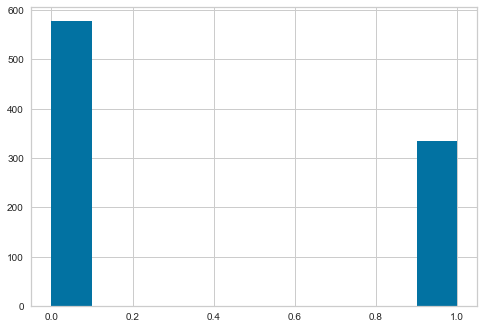

In [60]:
df.DESFECHO.hist();

In [61]:
target_variable = "DESFECHO" 
numerical_features = ["DIAS_INTER"]
categorical_features = [i for i in df.columns if i not in ["DIAS_INTER", "DESFECHO"]] 

print("Variável resposta = ", target_variable, "\nVariáveis númericas = ", numerical_features, "\nVariáveis categóricas = ", categorical_features)

Variável resposta =  DESFECHO 
Variáveis númericas =  ['DIAS_INTER'] 
Variáveis categóricas =  ['ID', 'PRI_ATEND', 'FAT_IMP_SIN', 'SEXO', 'FX_ETAR', 'CD_COR', 'CD_ECIV', 'ID_ESC', 'USOU_UTI']


In [62]:
label_map = {0: "NÃO OBITO", 1: "OBITO"}
df.DESFECHO = df.DESFECHO.map(label_map)

In [63]:
df.head() 

,ID,PRI_ATEND,DIAS_INTER,FAT_IMP_SIN,SEXO,FX_ETAR,CD_COR,CD_ECIV,ID_ESC,USOU_UTI,DESFECHO
0,1,1,3,1,1,3,2,1,1,0,NÃO OBITO
1,2,1,2,1,2,3,2,1,1,0,NÃO OBITO
2,3,1,2,2,2,3,2,1,1,0,NÃO OBITO
3,4,2,1,1,2,4,2,1,1,1,OBITO
4,4,2,1,1,2,4,2,1,1,0,OBITO


In [64]:
exp = classification.setup(df,
                            ignore_features=["ID", "ID_ESC"],
                            target=target_variable,
                            numeric_features=numerical_features,
                            categorical_features=categorical_features,
                            fix_imbalance=False,
                            train_size=0.9,
                            session_id=123,
                            silent=True
                           )

,Description,Value
0,session_id,123
1,Target,DESFECHO
2,Target Type,Binary
3,Label Encoded,"NÃO OBITO: 0, OBITO: 1"
4,Original Data,"(913, 11)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [65]:
model = classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7735,0.8393,0.7099,0.6798,0.6917,0.5134,0.5164,3.3110
ada,Ada Boost Classifier,0.7674,0.8380,0.6860,0.6765,0.6791,0.4972,0.4991,0.1150
gbc,Gradient Boosting Classifier,0.7601,0.8280,0.7400,0.6483,0.6867,0.4946,0.5019,0.1070
ridge,Ridge Classifier,0.7589,0.0000,0.7437,0.6462,0.6880,0.4938,0.5011,0.0120
xgboost,Extreme Gradient Boosting,0.7589,0.8283,0.6798,0.6677,0.6701,0.4811,0.4847,0.2920
lda,Linear Discriminant Analysis,0.7565,0.8355,0.7503,0.6415,0.6882,0.4912,0.4994,0.0120
lightgbm,Light Gradient Boosting Machine,0.7565,0.8398,0.6762,0.6631,0.6672,0.4758,0.4780,0.5500
catboost,CatBoost Classifier,0.7443,0.8346,0.6963,0.6385,0.6618,0.4581,0.4635,1.0720
rf,Random Forest Classifier,0.7370,0.8096,0.6292,0.6411,0.6322,0.4285,0.4308,0.2540
et,Extra Trees Classifier,0.7370,0.7685,0.6054,0.6486,0.6215,0.4217,0.4258,0.2670


In [66]:
previsoes = classification.predict_model(model)
previsoes.head() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6957,0.8203,0.6154,0.6486,0.6316,0.3726,0.3730


,DIAS_INTER,PRI_ATEND_1,PRI_ATEND_2,PRI_ATEND_3,FAT_IMP_SIN_1,FAT_IMP_SIN_2,FAT_IMP_SIN_3,SEXO_2,FX_ETAR_2,FX_ETAR_3,...,CD_COR_5,CD_ECIV_1,CD_ECIV_2,CD_ECIV_3,CD_ECIV_4,CD_ECIV_5,USOU_UTI_1,DESFECHO,Label,Score
0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,OBITO,OBITO,0.7252
1,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NÃO OBITO,NÃO OBITO,0.9607
2,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NÃO OBITO,NÃO OBITO,0.9113
3,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NÃO OBITO,NÃO OBITO,0.9777
4,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,OBITO,OBITO,0.6611


In [73]:
previsoes.columns 

Index(['DIAS_INTER', 'PRI_ATEND_1', 'PRI_ATEND_2', 'PRI_ATEND_3',
       'FAT_IMP_SIN_1', 'FAT_IMP_SIN_2', 'FAT_IMP_SIN_3', 'SEXO_2',
       'FX_ETAR_2', 'FX_ETAR_3', 'FX_ETAR_4', 'FX_ETAR_5', 'CD_COR_1',
       'CD_COR_2', 'CD_COR_3', 'CD_COR_4', 'CD_COR_5', 'CD_ECIV_1',
       'CD_ECIV_2', 'CD_ECIV_3', 'CD_ECIV_4', 'CD_ECIV_5', 'USOU_UTI_1',
       'DESFECHO', 'Label', 'Score'],
      dtype='object')

In [67]:
#model_tuned = classification.tune_model(model, n_iter=50, search_library="scikit-learn")

In [68]:
#classification.plot_model(model, "feature")

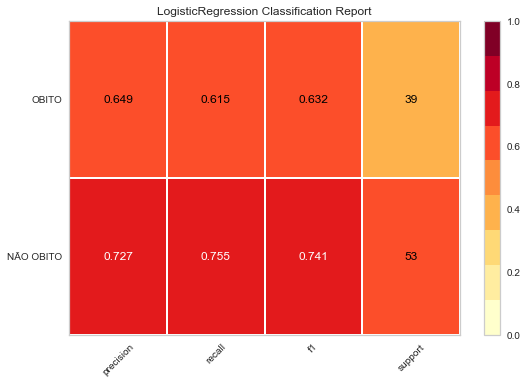

In [69]:
classification.plot_model(model, "class_report")

In [70]:
classification.evaluate_model(model) 

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [71]:
classification.finalize_model(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
filename_to_save = "model-covid-obito"
dir_model = "MODELOS/"
classification.save_model(model, model_name=dir_model + filename_to_save)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['PRI_ATEND',
                                                             'FAT_IMP_SIN',
                                                             'SEXO', 'FX_ETAR',
                                                             'CD_COR', 'CD_ECIV',
                                                             'USOU_UTI'],
                                       display_types=False,
                                       features_todrop=['ID', 'ID_ESC'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['DIAS_INTER'],
                                       target='DESFECHO', time_features=[])),
                 ('imputer',
                  Simple_Imputer(cate...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
    